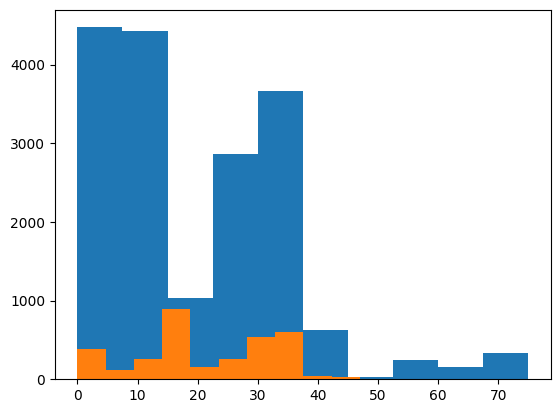

In [4]:
import matplotlib.pyplot as plt

from aglio.geo_points import EarthChem
from aglio.mapping import build_bounding_df

file = "data/earthchem/earthchem_download_90561.csv"

# load everything
echem = EarthChem(file, drop_duplicates_by=["latitude", "longitude", "age"])

# load with initial filters
initial_filters = [
    {"column": "age", "comparison": "<=", "value": 50},
    {"column": "rock_name", "comparison": "==", "value": "RHYOLITE"},
]
echem_filtered = EarthChem(
    file,
    initial_filters=initial_filters,
    drop_duplicates_by=["latitude", "longitude", "age"],
)

# apply additional filters after load
plt.hist(echem.df.age)
plt.hist(echem_filtered.df.age)
plt.show()



### find the volcanic extent within an initial bounding polygon

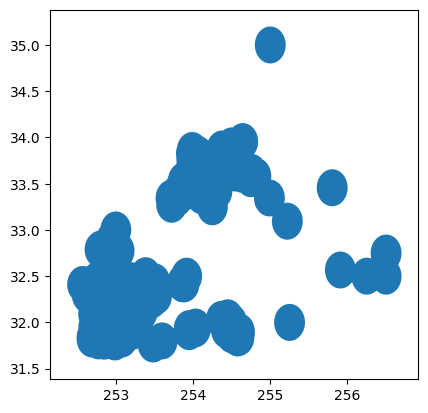

In [5]:


file = "data/earthchem/earthchem_download_90561.csv"

# load everything
echem = EarthChem(file, drop_duplicates_by=["latitude", "longitude", "age"])

# create a polygon and geodataframe
lats = [20, 20, 30, 35, 30, 20]
lons = [250, 260, 260, 255, 250, 250]
b_df, _ = build_bounding_df(lats, lons)

# find the volcanic extent
plain_df, gp_df, df_bound = echem.build_volcanic_extent(
    boundary_df=b_df, radius_deg=0.2
)

df_bound.plot()
plt.show()


### find the average shear wave velocity within volcanic bounds 

In [6]:
### add it